Задачи
==
Загрузите датасет transaction_data.csv. 
Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
Сколько транзакций завершились ошибкой?
Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.
Описание данных
==
Имеются следующие данные:

date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
name – имя пользователя
transaction – статус транзакции
minute* – сколько минут прошло с начала дня


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/20P4PUpwkigr2g

In [ ]:
'''5-2-1
Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений 
и описательную статистику.
Вопрос: сколько в датасете пропущенных значений?'''

In [19]:
transac = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/20P4PUpwkigr2g') #, parse_dates=['date']  , encoding='ISO-8859-1',
transac

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled
...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull


In [20]:
transac.dtypes

date           object
name           object
transaction    object
dtype: object

In [21]:
transac.shape

(5315, 3)

In [22]:
transac.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [23]:
transac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [24]:
transac.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [ ]:
'''5-2-2
Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? 
Визуализируйте результат с помощью барплота.
Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)'''

In [25]:
transac.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [28]:
trans_eye = transac.transaction.value_counts()
trans_eye

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

<AxesSubplot:>

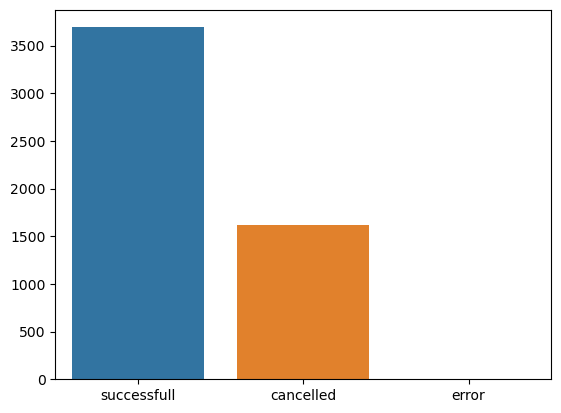

In [31]:
sns.barplot(x=trans_eye.index, y=trans_eye.values)

In [ ]:
'''5-2-4
Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull
Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, 
совершённых каждым пользователем, где

по оси x – число транзакций
по оси y – доля пользователей с таким числом транзакций'''

In [36]:
trans_name_succ=transac.query('transaction == "successfull"').groupby('name').agg({'transaction':'count'})
trans_name_succ.head(5)

,transaction
name,
Ekaterina_Fedorova,72
Ekaterina_Ivanova,59
Ekaterina_Lesnova,63
Ekaterina_Ozerova,72
Ekaterina_Petrova,68


<AxesSubplot:ylabel='Density'>

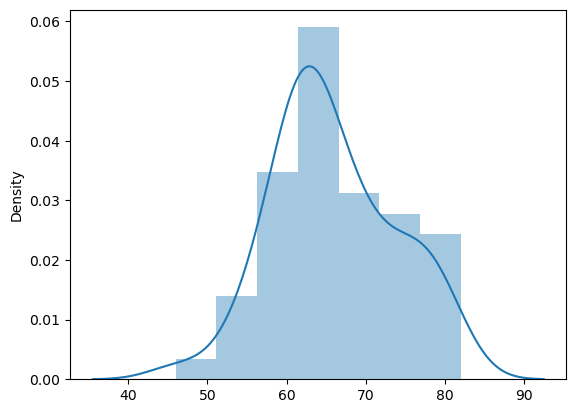

In [38]:
sns.distplot(trans_name_succ.values)

In [39]:
trans_name_succ.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [ ]:
'''
Пользователи в среднем совершили примерно по 66 транзакций
Максимальное число транзакций – 82
Примерно 25% пользователей совершили менее 61 транзакции'''

In [ ]:
'''5-2-5
💀 Сложное задание! 💀

К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:

столбцы – имена пользователей
строки – минута времени осуществления операции (minute)
значения – число совершённых операций
Пропущенные значения заполните нулями.

Note: фильтровать успешные транзакции не нужно - постройте табличку по всем.

Новые данные сохранены в df.'''

In [45]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/361624/transaction_data_updated.csv', parse_dates=['date'])
df

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [47]:
user_vs_minute_pivot = (df.groupby(['name', 'minute'], as_index=False)
                                   .agg({'transaction':'count'})
                                   .rename(columns={'transaction': 'Count'})
                                   .pivot(index='minute', columns='name', values='Count')
                                   .fillna(0))
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


5-2-8
Коллега построил следующий график по сводной таблице из предыдущего шага, и сомневается, что в данных нет ошибки. 

по оси x – минута транзакции (сколько минут прошло с начала дня)
по оси y – число транзакций
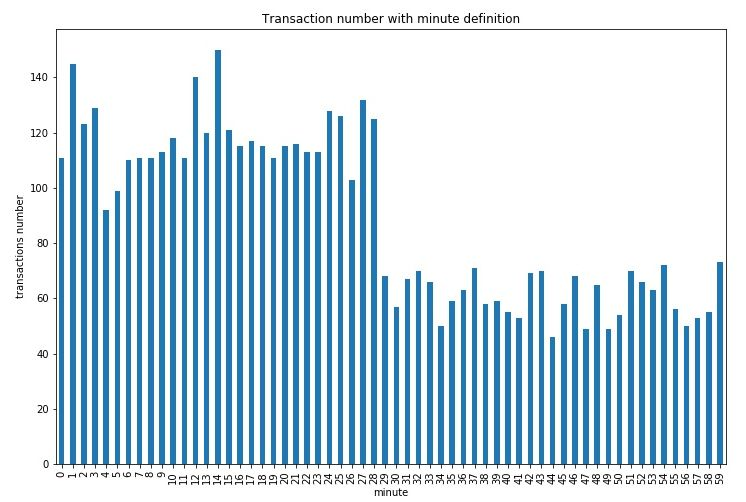
Как вы думаете, из-за чего мы видим такую картину? Произошла ошибка, или с данными всё хорошо?

In [ ]:
'''Извлекли минутную часть времени, а не число минут с начала дня'''

In [ ]:
'''5-2-9
Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. 
Результат сохраните в колонку true_minute. Постройте график, как в предыдущем шаге, и посмотрите, 
произошли ли изменения (график в код включать не нужно).

date                name               transaction  minute  true_minute
2020-03-02 00:37:20 Ekaterina_Petrova  cancelled    37      37
2020-03-02 01:06:14 Ekaterina_Smirnova successfull  6       66

Данные записаны в df , колонка date прочитана как дата.'''

In [50]:
df['true_minute'] = df.date.dt.hour.mul(60) + df.date.dt.minute
df.tail()

,date,name,transaction,minute,true_minute
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13
5314,2020-03-02 01:15:45,Irina_Fedorova,cancelled,15,75


In [59]:
trans_min = df.groupby('true_minute').agg({'transaction':'count'})
trans_min

,transaction
true_minute,
0,64
1,77
2,68
3,65
4,57
...,...
85,68
86,52
87,59


In [57]:
trans_min2= df.true_minute.value_counts().sort_index()

0     64
1     77
2     68
3     65
4     57
      ..
85    68
86    52
87    59
88    62
89     5
Name: true_minute, Length: 90, dtype: int64

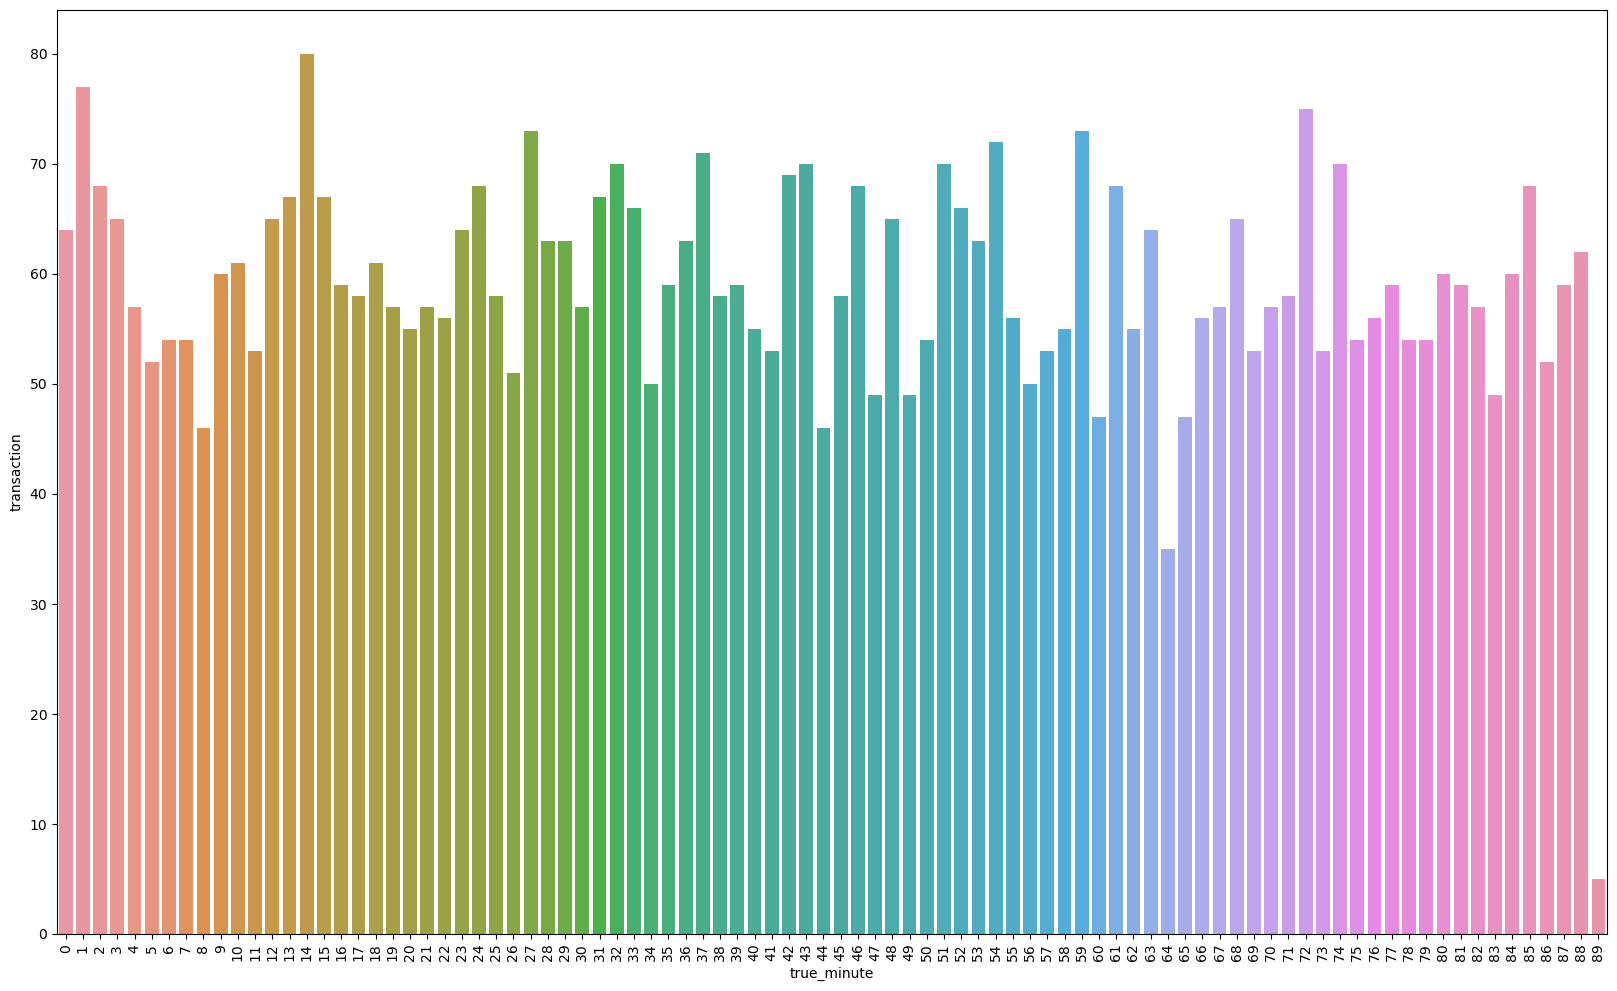

In [86]:
plt.figure(figsize=(20, 12)) #размер графика всегда идет первой строкой
sns.barplot(x=trans_min.index, y=trans_min.transaction)
plt.xticks(fontsize=10, rotation = 90)# изменяет размер шрифта на оси х и угол наклона
# https://stackoverflow.com/questions/6390393/matplotlib-make-tick-labels-font-size-smaller
plt.show()